In [2]:
%matplotlib inline
from plasma_parameter_calculator import *
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.constants as c
from lmfit import Model

# Interferometry Comparison

In [3]:
cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [4]:
eo=np.loadtxt(open('s0513_15 neL end on.txt',"r"),delimiter=",")
eo=np.nan_to_num(eo)

In [5]:
so=np.loadtxt(open('s0513_15 neL side on.txt',"r"),delimiter=",")
so=np.nan_to_num(so)
so=so-so.min()
so=so[1200:2600,:]

In [6]:
s_scale=100
e_scale=173
i_eo=np.sum(eo,1)/(e_scale*10)
i_so=np.sum(so,0)/(s_scale*10)

In [7]:
rescaling_factor=float(s_scale)/e_scale
new_px=np.linspace(0, i_eo.size,i_eo.size*rescaling_factor)
old_px=np.arange(i_eo.size)
i_eo_scaled=np.interp(new_px, old_px, i_eo)
i_so_centre=2400+i_so[2400:2600].argmax()
i_eo_centre=700+i_eo_scaled[700:1000].argmax()

In [43]:
take=400
i_so_sn=i_so[i_so_centre-take:i_so_centre+take]
a_so=np.mean(so,0)
a_so_sn=a_so[i_so_centre-take:i_so_centre+take]
i_eo_sn=i_eo_scaled[i_eo_centre-take:i_eo_centre+take]
y=np.linspace(-take/100.0, take/100.0, 2*take)

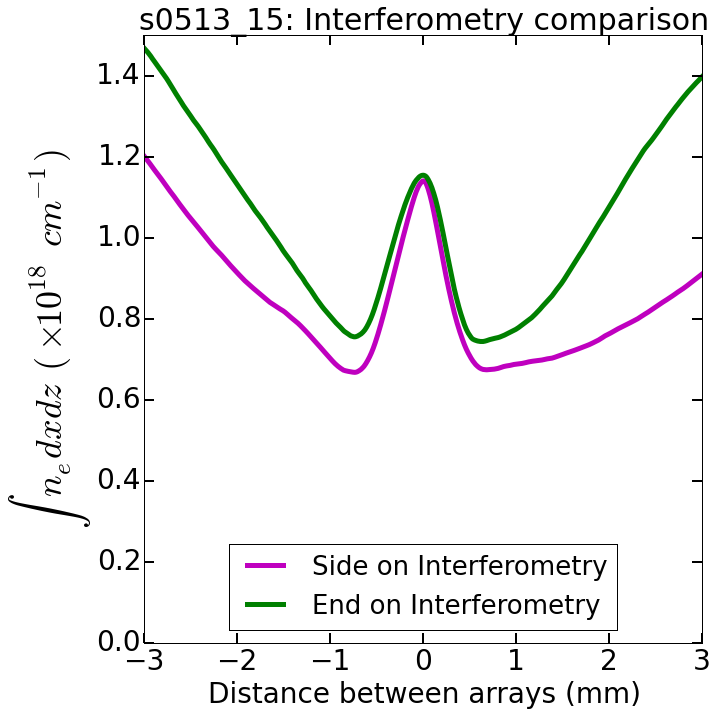

In [10]:
fig, ax=plt.subplots(figsize=(10,10))
plt1=ax.plot(y,i_so_sn/1e18, lw=5, color='m', label='Side on Interferometry')
plt2=ax.plot(y,i_eo_sn/1e18, color='g', lw=5, label='End on Interferometry')
ax.set_xlim([-3,3])
ax.set_xticks(np.arange(-3,3+1,1))
ax.set_xlabel('Distance between arrays (mm)', fontsize=28)
ax.set_ylim([0,1.5])
ax.set_ylabel(r'$\int \,n_e dxdz \,(\times 10^{18}\,cm^{-1})$',fontsize=36)
ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.legend(loc=8,fontsize=26)
ax.set_title('s0513_15: Interferometry comparison',fontsize=30)
fig.tight_layout()

In [15]:
fig.savefig('s0513_15 IF comparison.png')

# Magnetic Fields

In [38]:
%cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"
B_dat=np.loadtxt(open('s0513_15 B profiles.txt',"r"),delimiter=",")
Bs=B_dat[:,1]
y_B=B_dat[:,0]

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


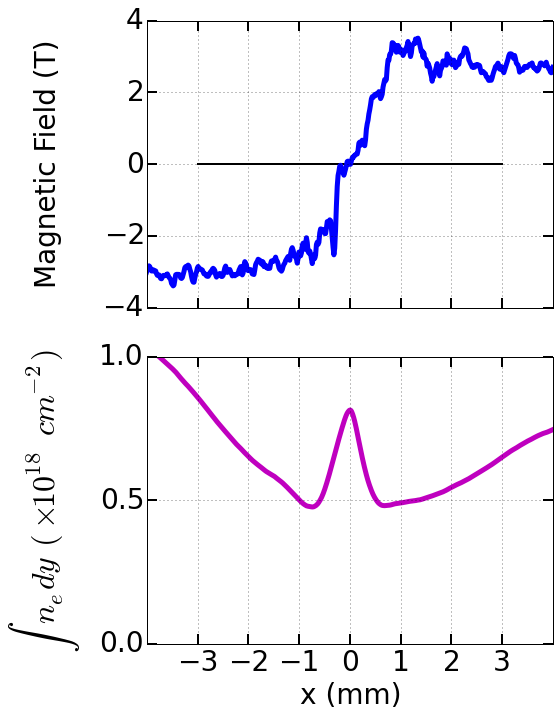

In [44]:
fig, (ax1,ax2)= plt.subplots(2, sharex=True, figsize=(8,10))

plot_line=ax1.plot([-3, 3], [0, 0], color='k', linewidth=2)
plot_B=ax1.plot(y_B,Bs, label='Magnetic Field', color='b', lw=5)
plot_ne=ax2.plot(y,a_so_sn/1e18, lw=5, color='m', label='Electron Density')

ax1.set_xlim([-4,4])
ax1.set_xticks(np.arange(-3,3+1,1))
ax2.set_xlabel('x (mm)', fontsize=28)
ax1.set_ylim([-4,4])
ax1.set_yticks([-4,-2,0,2,4])
ax1.set_ylabel('Magnetic Field (T)',fontsize=28)

ax2.set_ylim([0,1])
ax2.set_yticks([0,0.5,1])

ax1.get_yaxis().set_label_coords(-0.21,0.5)
ax2.get_yaxis().set_label_coords(-0.16,0.5)


ax2.set_ylabel(r'$\int \,n_e dy \,(\times 10^{18}\,cm^{-2})$',fontsize=32)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax2.tick_params(labelsize=28, pad=5, length=10, width=2)
#ax1.set_title(r's0513_15: $B$ and $n_e$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
fig.tight_layout()

In [28]:
fig.savefig('s0513_15 b and ne.png')

# Bring in TS Data from s0611_15

In [82]:
cd "~\Google Drive\MAGPIE\data\2015\s0611_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15


In [83]:
#Fibre,X positions,Y Positions,Y wrt Shock,Length along porbing line,n_e, 6:n_e corrected, 7:T_e, 8:T_i, 9:Z, 10:V_f_par, 11:V_f_per
y_pos=[]
n_e=[]
Z=[]
T_e=[]
T_e_err=[]
T_i=[]
T_i_err=[]
V=[]
V_err=[]

filename='s0611_15 TS fits v3.dat'
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    for row in reader:
        y_pos.append(float(row[3]))
        n_e.append(float(row[5]))
        Z.append(float(row[6]))
        T_e.append(float(row[7]))
        tee=float(row[8])
        if tee==0:
            T_e_err.append(float(row[7])/10.0)
        else:
            T_e_err.append(tee)
        T_i.append(float(row[9]))
        tie=float(row[10])
        if tie==0:
            T_i_err.append(float(row[9])/10.0)
        else:
            T_i_err.append(tie)
        V.append(float(row[11]))
        ve=float(row[12])
        if tie==0:
            V_err.append(float(row[11])/10.0)
        else:
            V_err.append(ve)
        
y_TS=np.array(y_pos)
n_e=np.array(n_e)
n_e_err=np.zeros_like(n_e)+0.3e17
Z=np.array(Z)
T_e=np.array(T_e)
T_e_err=np.array(T_e_err)
T_i=np.array(T_i)
T_i_err=np.array(T_i_err)
V=np.array(V)*1e5
V_err=np.array(V_err)*1e5
B_TS=np.interp(y_TS, y_B, Bs)
pp=Plasma(A=12,Z=Z,n_e=n_e,T_e=T_e,T_i=T_i,B=B_TS, V=V*1e2,L=1.0)

C:\Users\jdavies\Documents\magpie-analysis\plasma_parameter_calculator.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if T_e==None:
C:\Users\jdavies\Documents\magpie-analysis\plasma_parameter_calculator.py:43: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if T_i==None:
C:\Users\jdavies\Documents\magpie-analysis\plasma_parameter_calculator.py:98: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.V!=None:
C:\Users\jdavies\Documents\magpie-analysis\plasma_parameter_calculator.py:102: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.V!=None and self.L!=None:


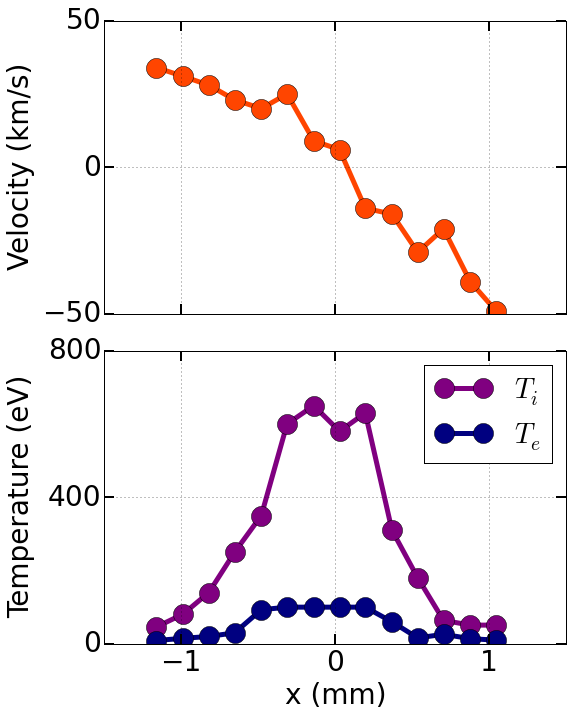

In [96]:
fig, ax=plt.subplots(2, sharex=True, figsize=(8,10))
ax1=ax[0]
ax2=ax[1]
plot_V=ax[0].plot(y_TS,V/1e5, color='orangered', lw=5,marker='o', markersize=20)
plot_Ti=ax[1].plot(y_TS,T_i, lw=5, color='purple',marker='o', markersize=20, label=r'$T_i$')
plot_Te=ax[1].plot(y_TS,T_e, lw=5, color='navy',marker='o', markersize=20, label=r'$T_e$')

ax1.set_xlim([-1.5,1.5])
ax1.set_xticks(np.arange(-1,1.1,1))
ax1.set_ylim([-50,50])
ax1.set_yticks(np.arange(-50,51,50))
ax1.set_ylabel('Velocity (km/s)',fontsize=28)
ax2.set_ylim([0,600])
ax2.set_yticks(np.arange(0,801,400))

ax2.set_ylabel(r'Temperature (eV)',fontsize=28)
ax2.set_xlabel('x (mm)', fontsize=28)

ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax2.tick_params(labelsize=28, pad=5, length=10, width=2)
ax2.legend(fontsize=28)
#ax1.set_title(r's0611_15: $V$ and $T_i$',fontsize=50, y=1.02)

ax1.get_yaxis().set_label_coords(-0.15,0.5)
ax2.get_yaxis().set_label_coords(-0.15,0.5)

ax1.grid()
ax2.grid()
fig.tight_layout()

In [98]:
fig.savefig('s0611_15 V, Te, Ti  profiles hi res.pdf', dpi=300)

# Harris Sheet

In [29]:
def Harris(y, B0, L):
    return B0*np.tanh(y/L)

 - Adding parameter for hint "B0"
 - Adding parameter for hint "L"
 - Adding parameter "B0"
 - Adding parameter "L"
[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 500
    # variables        = 2
    chi-square         = 41.154
    reduced chi-square = 0.083
[[Variables]]
    B0:   2.90880313 +/- 0.015687 (0.54%) (init= 3)
    L:    0.62364310 +/- 0.017141 (2.75%) (init= 0.25)
[[Correlations]] (unreported correlations are <  0.100)
    C(B0, L)                     =  0.456 



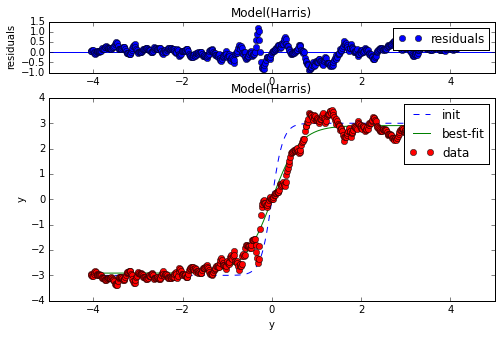

In [46]:
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 3)
hm.set_param_hint('L', value = 0.25)
res=hm.fit(Bs, y=y_B)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(8,5)})
print(res.fit_report())

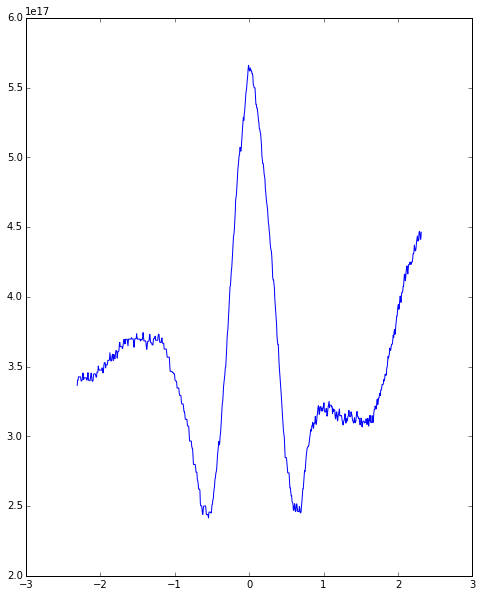

In [48]:
eo_0=eo[:,2400]/1.6#ne at centre from end on
eo_0_centre=1400
eo_0t=eo_0[eo_0_centre-400:eo_0_centre+400]
y_eo_0=np.linspace(-400,400, 800)/173.0
fig, ax=plt.subplots(figsize=(8,10))
plot=ax.plot(y_eo_0,eo_0t)

In [59]:
j=B0_fit/(c.mu_0*(L_fit*1e-3)*(np.cosh(y_B/L_fit))**2)
#n_e_B=np.interp(y_B, y,a_so_sn)
n_e_B=np.interp(y_B, y_eo_0,eo_0t)
u_e=j/(c.e*(n_e_B*1e6))
V_Ti=9.79e3*((Z*T_e+T_i)/12)**0.5

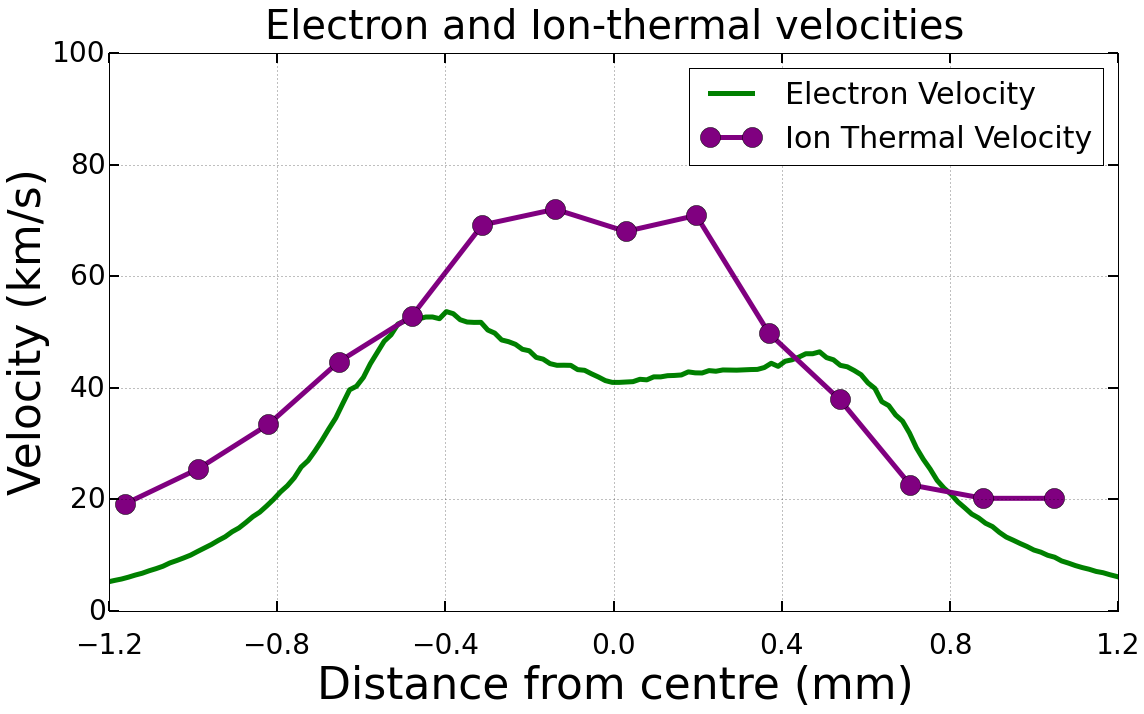

In [60]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_u_e=ax1.plot(y_B,u_e/1e3, color='green', label='Electron Velocity', lw=5)
plot_V_Ti=ax1.plot(y_TS,pp.V_ti/1e5, lw=5, color='purple',label='Ion Thermal Velocity',marker='o', markersize=20)

ax1.set_xlim([-1.2,1.2])
ax1.set_xticks(np.arange(-1.2,1.3,0.4))
ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylim([0,100])
#ax1.set_yticks(np.arange(-50,51,25))
ax1.set_ylabel('Velocity (km/s)',fontsize=44)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Electron and Ion-thermal velocities',fontsize=40, y=1.02, )
ax1.legend(fontsize=30)
ax1.grid()
fig.tight_layout()

NameError: name 'u_e' is not defined

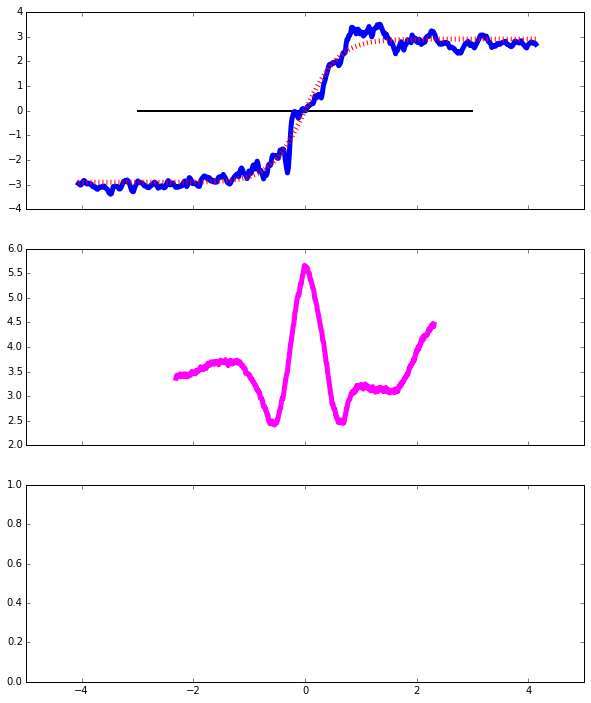

In [49]:
fig, (ax1,ax2, ax3)= plt.subplots(3, sharex=True, figsize=(10,12))

plot_line=ax1.plot([-3, 3], [0, 0], color='k', linewidth=2)
plot_Bexp=ax1.plot(y_B,Bs, label='B Measured', color='blue', lw=5)
plot_Bfit=ax1.plot(y_B,res.best_fit, label='B Fitted', color='red', lw=5, ls=':')
plot_ne=ax2.plot(y_eo_0,eo_0t/1e17, lw=5, color='magenta', label=r'$n_e$')
plot_u_e=ax3.plot(y_B,u_e/1e3, color='green', label=r'U$_{ed}$', lw=5)
plot_V_Ti=ax3.plot(y_TS,pp.V_ti/1e5, lw=5, color='red',label=r'C$_{IA}$',marker='o', markersize=15)


ax1.set_xlim([-3,3])
ax1.set_xticks(np.arange(-3,3+1,1))
ax3.set_xlabel('Distance from centre (mm)', fontsize=26)

ax1.set_ylim([-4,4])
ax1.set_yticks(np.arange(-4,5,4))
ax1.set_ylabel('Magnetic Field (T)',fontsize=24)
ax1.get_yaxis().set_label_coords(-0.12,0.5)


ax2.set_ylim([0,6])
ax2.set_yticks(np.arange(0,7,3))
ax2.set_ylabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=24)
ax2.get_yaxis().set_label_coords(-0.12,0.5)

ax3.set_ylim([0,100])
ax3.set_yticks(np.arange(0,101,50))
ax3.set_ylabel('Velocity (km/s)',fontsize=24)
ax3.get_yaxis().set_label_coords(-0.12,0.5)


ax1.tick_params(labelsize=26, pad=5, length=10, width=2)
ax2.tick_params(labelsize=26, pad=5, length=10, width=2)
ax3.tick_params(labelsize=26, pad=5, length=10, width=2)

ax1.legend(fontsize=20, loc=2)
ax2.legend(fontsize=20, loc=2)
ax3.legend(fontsize=20, loc=2)

#ax1.set_title(r's0513_15: $B$, $n_e$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
ax3.grid()
fig.tight_layout()

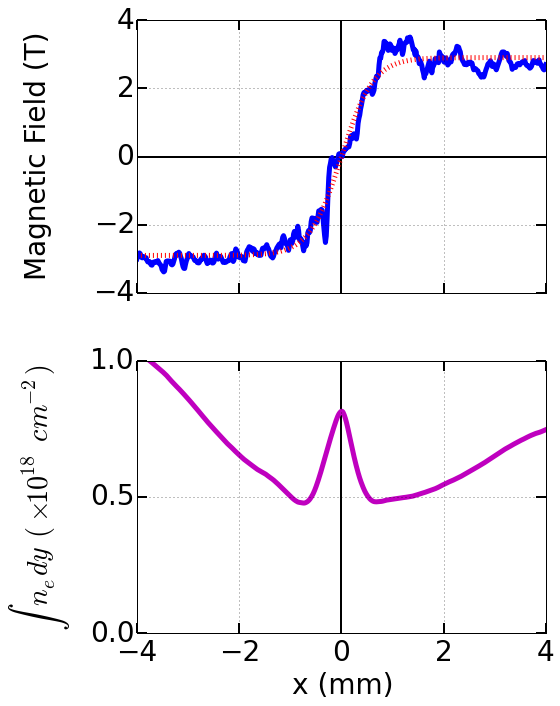

In [63]:
fig, (ax1,ax2)= plt.subplots(2, sharex=True, figsize=(8,10))

ax1.plot([-4, 4], [0, 0], color='k', linewidth=2)
ax1.plot([0, 0], [-4, 4], color='k', linewidth=2)
ax2.plot([0, 0], [0, 1], color='k', linewidth=2)

ax1.plot(y_B,Bs, label='Magnetic Field', color='b', lw=5)
ax1.plot(y_B,res.best_fit, label='B Fitted', color='red', lw=5, ls=':')

ax2.plot(y,a_so_sn/1e18, lw=5, color='m', label='Electron Density')

ax1.set_xlim([-4,4])
ax1.set_xticks(np.arange(-4,4+1,2))
ax2.set_xlabel('x (mm)', fontsize=28)
ax1.set_ylim([-4,4])
ax1.set_yticks([-4,-2,0,2,4])
ax1.set_ylabel('Magnetic Field (T)',fontsize=28)

ax2.set_ylim([0,1])
ax2.set_yticks([0,0.5,1])

ax1.get_yaxis().set_label_coords(-0.21,0.5)
ax2.get_yaxis().set_label_coords(-0.16,0.5)

fig.subplots_adjust(hspace=0.8)


ax2.set_ylabel(r'$\int \,n_e dy \,(\times 10^{18}\,cm^{-2})$',fontsize=28)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax2.tick_params(labelsize=28, pad=5, length=10, width=2)
#ax1.set_title(r's0513_15: $B$ and $n_e$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
fig.tight_layout()

In [65]:
fig.savefig('s0513_15 b, ne  profiles hi res.pdf', dpi=300)

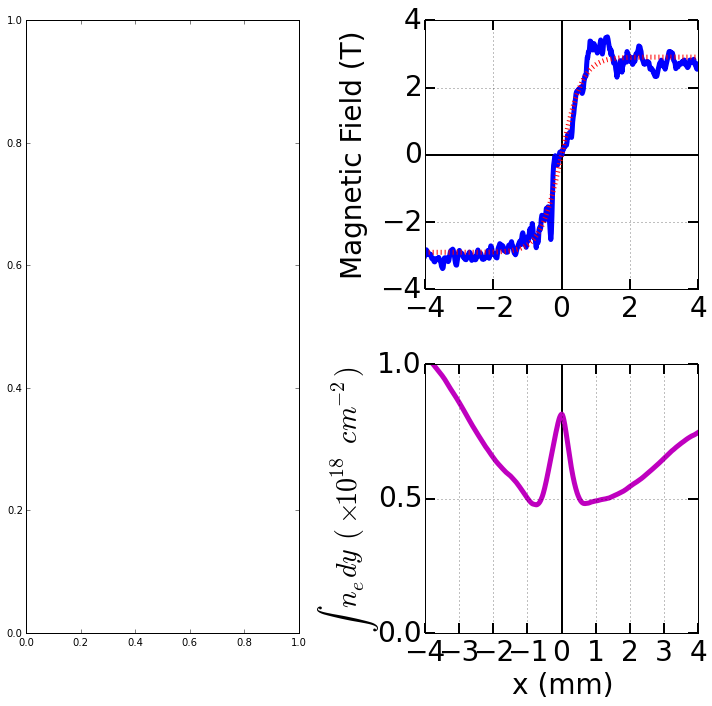

In [80]:
fig=plt.figure(figsize=(10,10))
ax0 = plt.subplot2grid((2,2), (0, 0), rowspan=2)
ax1 = plt.subplot2grid((2,2), (0, 1))
ax2 = plt.subplot2grid((2,2), (1, 1))

ax1.plot([-4, 4], [0, 0], color='k', linewidth=2)
ax1.plot([0, 0], [-4, 4], color='k', linewidth=2)
ax2.plot([0, 0], [0, 1], color='k', linewidth=2)

ax1.plot(y_B,Bs, label='Magnetic Field', color='b', lw=5)
ax1.plot(y_B,res.best_fit, label='B Fitted', color='red', lw=5, ls=':')

ax2.plot(y,a_so_sn/1e18, lw=5, color='m', label='Electron Density')

ax1.set_xlim([-4,4])
ax1.set_xticks(np.arange(-4,4+1,2))
ax2.set_xlabel('x (mm)', fontsize=28)
ax1.set_ylim([-4,4])
ax1.set_yticks([-4,-2,0,2,4])
ax1.set_ylabel('Magnetic Field (T)',fontsize=28)

ax2.set_ylim([0,1])
ax2.set_yticks([0,0.5,1])

ax1.get_yaxis().set_label_coords(-0.21,0.5)
ax2.get_yaxis().set_label_coords(-0.16,0.5)

fig.subplots_adjust(hspace=0.8)


ax2.set_ylabel(r'$\int \,n_e dy \,(\times 10^{18}\,cm^{-2})$',fontsize=28)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax2.tick_params(labelsize=28, pad=5, length=10, width=2)
#ax1.set_title(r's0513_15: $B$ and $n_e$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
fig.tight_layout()

# Error Bars

In [23]:
from mcerp import N, umath, LogN, Gamma  # N, U, Gamma, Beta, correlate, etc.
def Gamma_mu_sig(mu,sig):
    k=mu**2/sig**2
    theta=sig**2/mu
    return Gamma(k, theta)
G_uv=lambda q, q_err: np.array([Gamma_mu_sig(qq, qe) for qq, qe in zip(q, q_err)])
N_uv=lambda q, q_err: np.array([N(qq, qe) for qq, qe in zip(q, q_err)])
def uv_m_std(uv):
    uv_mean=np.array([u.mean for u in uv])
    uv_std=np.array([u.std for u in uv])
    return uv_mean, uv_std

def Harris_B(y, B0, L):
    return B0*np.tanh(y/L)
def Harris_B_uv(y, B0, L):
    return np.array([B0*umath.tanh(yy/L) for yy in y])
def Harris_j_uv(y, B0, L):
    return np.array([B0/(c.mu_0*L*umath.cosh(yy/L)**2) for yy in y])

In [24]:
n_e_uv=G_uv(n_e,n_e_err)
T_e_uv=G_uv(T_e,T_e_err)
T_i_uv=G_uv(T_i,T_i_err)
V_uv=N_uv(V,V_err)

y_pos_err=np.zeros_like(y_pos)+5e-5
y_uv=N_uv(y_pos, y_pos_err)

B0_uv=N(6.24, 0.05)
L_uv=N(0.69,0.02)#in mm
B_uv=Harris_B_uv(y_uv,B0_uv,L_uv)
j_uv=Harris_j_uv(y_uv*1e-3,B0_uv,L_uv*1e-3)#in A/m^-2

n_e_B_uv=N_uv(n_e_B, np.zeros_like(n_e_B)+0.3e17)#in cm^-3
u_e_uv=j_uv/(c.e*(n_e_B_uv*1e6))#in m/s
V_Ti_uv=9.79e3*((Z*T_e_uv+T_i_uv)/12)**0.5# in cm/s

ValueError: operands could not be broadcast together with shapes (14,) (400,) 

In [ ]:
ue_m, ue_std=uv_m_std(u_e_uv)
V_IA_m, V_IA_std=uv_m_std(V_Ti_uv)

fig, ax1=plt.subplots(figsize=(16,10))

plot_u_e=ax1.errorbar(y_pos,ue_m/1e3, yerr=ue_std/1e3,color='orangered', label='Electron Velocity', lw=5,marker='o', markersize=20)
plot_V_Ti=ax1.errorbar(y_TS,V_IA_m/1e3, lw=5, yerr=V_IA_std/1e3,color='purple',label='Ion Thermal Velocity',marker='o', markersize=20)

ax1.set_xlim([-1.4,1.4])
ax1.set_xticks(np.arange(-1.2,1.3,0.4))
ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylim([0,100])
#ax1.set_yticks(np.arange(-50,51,25))
ax1.set_ylabel('Velocity (km/s)',fontsize=44)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Electron and Ion-thermal velocities',fontsize=40, y=1.02, )
ax1.legend(fontsize=30)
ax1.grid()
fig.tight_layout()

In [ ]:
fig, ax1=plt.subplots(figsize=(16,10))
j_m, j_st=uv_m_std(j_uv)

plot_j=ax1.errorbar(y_pos, j_TS)
plot_j_uv=ax1.errorbar(y_pos,j_m)


In [ ]:
j_TS/j_m

# Old Code

In [ ]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_rat=ax1.plot(y_TS,u_e/(pp.V_ti*1e-2), color='red', lw=5,marker='o', markersize=20)
plot_line=ax1.plot([-1.5, 1.5], [1, 1], color='k', linewidth=2, ls='-.')


ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylabel(r'$u_e/V_{ti}$',fontsize=44)
ax1.tick_params(labelsize=44, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Electron:Ion-thermal velocity',fontsize=40, y=1.02, )

ax1.grid()
fig.tight_layout()

# Plasma Parameters

In [ ]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_ompe=ax1.plot(y_TS,pp.delta_i*1e4, color='red', lw=5,marker='o', markersize=20)

ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylabel(r'$\delta_i$ (microns)',fontsize=44)
ax1.tick_params(labelsize=44, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Ion Inertial Length',fontsize=40, y=1.02, )
ax1.set_ylim([0,1000])


ax1.grid()
fig.tight_layout()

In [ ]:
B_TS_harris=np.interp(y_TS, y_B, res.best_fit) #use Harris sheet for smoothness
p=Plasma(A=12,Z=Z[8],n_e=n_e[8],T_e=T_e[8],T_i=T_i[8],B=6.2, V=5e6,L=0.009)
p.Rm

# Energy Balance

In [ ]:
dy=(y_TS[1]-y_TS[0])*1e-3#dy in metres
y_interp=(y_TS+np.roll(y_TS,1))/2.0
y_interp=y_interp[1:]
B_TS_Harris=np.interp(y_TS, y_B, res.best_fit)
magnetic_power_in=B_TS_Harris**2*V/(2*c.mu_0)#Magnetic energy flux per unit area perpendicular to flow.
j_interp=np.interp(y_interp, y_B, j)
eta_interp=np.interp(y_interp, y_TS, pp.eta_perp)
ohmic_heating=1e-2*eta_interp*j_interp**2*dy#eta j**2 is power puv, *dy for puA
mpi_diff=np.diff(magnetic_power_in)

In [ ]:
fig, ax1=plt.subplots(figsize=(16,10))
#plot_mpi=ax1.plot(y_TS,magnetic_power_in, color='blue', lw=5,marker='o', markersize=20)
#plot_oh=ax1.plot(y_TS,ohmic_heating, color='red', lw=5,marker='o', markersize=20)
#plot_eta_perp=ax1.plot(y_TS,j_TS, color='blue', lw=5,marker='o', markersize=20)
plot_mpi=ax1.step(y_interp,-mpi_diff/1e9, color='blue', lw=5, where='mid', label='Magnetic Power Flux Lost')
plot_oh=ax1.step(y_interp,ohmic_heating/1e9, color='red', lw=5, label='Ohmic Heating', where='mid')
plot_diff=ax1.step(y_interp,(-mpi_diff-ohmic_heating)/1e9, color='green', lw=5, ls=':', label='Difference', where='mid')


ax1.set_xlabel('Distance from centre (mm)', fontsize=36)
ax1.set_ylabel(r'Power per unit area (GW/m$^2$)',fontsize=36)
ax1.tick_params(labelsize=36, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Power balance in Carbon Reconnection',fontsize=40, y=1.02, )
#ax1.set_ylim([0,200])
ax1.set_xlim([-1.5,1.5])
ax1.legend(fontsize=32)
ax1.grid()
fig.tight_layout()

In [ ]:
'''
Compare the magnetic poweer flux into a 'volume' as V*B^2 with the ohmic power that volume can disapate.
'''
eta_full=np.interp(y_B, y_TS, pp.eta_perp)
V_full=np.interp(y_B, y_TS, V)
B_har=res.best_fit
magnetic_power_in_full=B_har**2*V_full/(2*c.mu_0)#Magnetic energy flux per unit area perpendicular to flow.
ohmic_heating_full=1e-2*eta_full*j**2#eta j**2 is power puv, *dy for puA

y_0_ind=np.where(y_B>=0)[0][0]
y_half=y_B[1:y_0_ind]
oh_dis=np.zeros_like(y_half)
mp_in=np.zeros_like(y_half)
for y_ind, y in enumerate(y_half):
    y_left=y_ind
    y_right=np.where(y_B>-y)[0][0]
    oh_dis[y_ind]=np.trapz(ohmic_heating_full[y_left:y_right], x=y_B[y_left:y_right]*1e-3)
    mp_in[y_ind]=magnetic_power_in_full[y_left]-magnetic_power_in_full[y_right]

In [ ]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_mpi=ax1.plot(y_half,mp_in/1e9, color='blue', lw=5, label='Magnetic power flux into volume')
plot_oh=ax1.plot(y_half,oh_dis/1e9, color='red', lw=5, label='Ohmic heating inside volume')
#plot_diff=ax1.plot(y_half,(mp_in-oh_dis)/mp_in, color='green', lw=5, ls=':',label='Discrepancy')

ax1.set_xlabel('Distance from centre (mm)', fontsize=36)
ax1.set_ylabel(r'Power per unit area (GW/m$^2$)',fontsize=36)
ax1.tick_params(labelsize=36, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Power balance in Carbon Reconnection',fontsize=40, y=1.02, )
ax1.set_ylim([0,1000])
ax1.set_xlim([-1.0,0])
ax1.legend(fontsize=32)

ax1.grid()
fig.tight_layout()

In [ ]:
V_1mm=32e3
y_1mm=np.where(y_B>-1)[0][0]
y_0=np.where(y_B>0)[0][0]

mag_fp_in_pua=res.best_fit[y_1mm]**2*V_1mm/(2*c.mu_0)
L_range=np.linspace(1e-5,1e-3, 10000)
oh_p_pua=np.zeros_like(L_range)

for Lind, L in enumerate(L_range):
    y=y_B*1e-3#convert to mm
    j=B0_fit/(c.mu_0*L*(np.cosh(y/L))**2)
    oh_p_puv=1e-2*eta_full*j**2
    oh_p_pua[Lind]=np.trapz(oh_p_puv[y_1mm:y_0], x=y[y_1mm:y_0])
    

In [ ]:
L_ind=np.where(mag_fp_in_pua>oh_p_pua)[0][0]
print L_range[L_ind]*1e3, L_fit

In [ ]:
oh_p_pua

In [ ]:
j_TS=np.interp(y_TS, y_B, j)

VB=pp.V*pp.B*1e-2
eta_j=j_TS*pp.eta_perp*1e-2
fig, ax1=plt.subplots(figsize=(16,10))

#plot_vb=ax1.plot(y_TS,VB, color='blue', lw=5, label='VxB')
plot_ej=ax1.plot(y_TS, VB-eta_j, color='red', lw=5, label='eta j')
#plot_diff=ax1.plot(y_half,(mp_in-oh_dis)/mp_in, color='green', lw=5, ls=':',label='Discrepancy')

ax1.set_xlabel('Distance from centre (mm)', fontsize=36)
#ax1.set_ylabel(r'Power per unit area (GW/m$^2$)',fontsize=36)
ax1.tick_params(labelsize=36, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
#ax1.set_title(r'Power balance in Carbon Reconnection',fontsize=40, y=1.02, )
#ax1.set_ylim([0,1000])
#ax1.set_xlim([-1.0,0])
ax1.legend(fontsize=32)

ax1.grid()
fig.tight_layout()

In [ ]:
from lmfit import Model